## Task Description

In this exercise, we will implement a perceptron to classify iris plants using the classic Iris dataset. The Iris dataset contains three classes of iris plants with 50 instances each. Each instance has four attributes: sepal length, sepal width, petal length, and petal width. The goal is to classify these plants into their respective classes.

## Problem Statement

1. **Dataset Preparation**:
    - Choose two linearly separable classes from the Iris dataset.
    - Select two features for classification.
    - Preprocess the data using Pandas:
        - Remove the class not used for classification.
        - Drop the features not used for classification.
        - Assign binary labels (0 and 1) to the selected classes.

2. **Perceptron Implementation**:
    - Implement a perceptron with two inputs and one output using the unit step activation function.
    - Train the perceptron on the prepared dataset.

3. **Visualization**:
    - Implement a plot function using `matplotlib` to visualize the classified data and the decision boundary.

4. **Weight Initialization**:
    - Experiment with different initial weight values to achieve optimal separation.

5. **Comparison with SVM**:
    - Adapt the SVM code provided in the lecture to classify the same dataset.
    - Compare the performance and implementation differences between the perceptron and SVM models.


Figure 1 shows pairwise relationships in the given dataset.

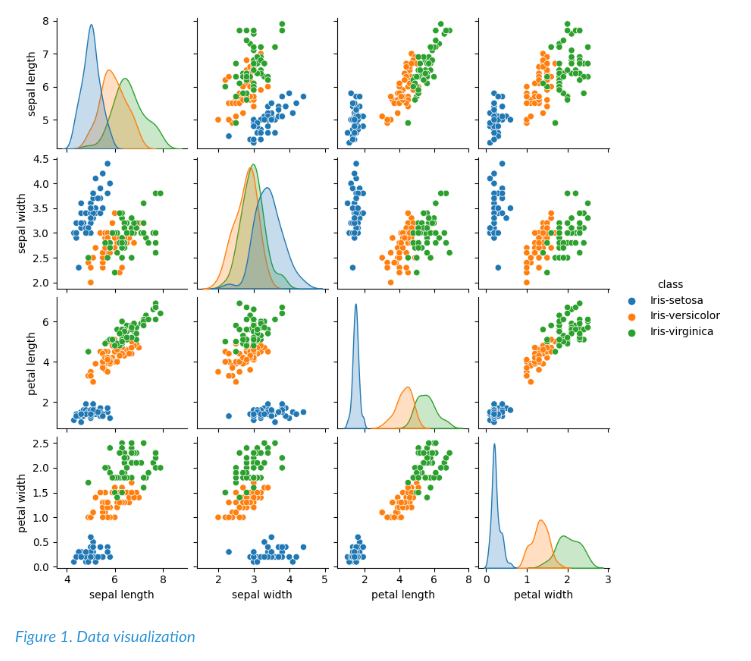

### Step 1: Dataset Preparation

First, we load the Iris dataset and select two classes and two features for our perceptron model.
We'll use Pandas to load the dataset from the file you provided (`iris.csv`).


In [52]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
# a. Read the data
dataset = pd.read_csv('iris_dataset/iris.csv', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


let's take classes 'Iris-setosa' and 'Iris-versicolor' and features 'sepal length' and 'petal length', and we filter dataset to include only these two classes and features  
these 2 classes 'Iris-setosa' and 'Iris-versicolor' are linearly separable classes with these features, we can see it visually in the Figure 1

In [54]:
class1 = 'Iris-setosa' # we chose it
class2 = 'Iris-versicolor' # we chose it
class3 = 'Iris-virginica' # we didn't chose it

# b. Remove the class that you will not classify
dataset = dataset.drop(index=dataset.index[dataset['class'] == class3])

dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  100 non-null    float64
 1   sepal width   100 non-null    float64
 2   petal length  100 non-null    float64
 3   petal width   100 non-null    float64
 4   class         100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we convert the class labels to binary, where 'Iris-setosa' is 0 and 'Iris-versicolor' is 1


In [55]:
# our two chosen features
feature1 = 'sepal length'
feature2 = 'petal length'

# c. Remove the columns that you will not use for classification, we are not using sepal width and petal width
binary_dataset = dataset.drop(columns=['sepal width', 'petal width'])

binary_dataset.info()
binary_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  100 non-null    float64
 1   petal length  100 non-null    float64
 2   class         100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


,sepal length,petal length,class
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [56]:
# d. Assign 0 and 1 to the remaining classes which are 'Iris-setosa' and 'Iris-versicolor' we chose before
binary_dataset.loc[binary_dataset['class'] == class1, 'class'] = 0
binary_dataset.loc[binary_dataset['class'] == class2, 'class'] = 1

binary_dataset.info()
binary_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  100 non-null    float64
 1   petal length  100 non-null    float64
 2   class         100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


,sepal length,petal length,class
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


Let's implement perceptron classifier with 2 inputs, 1 output and the unit step activation function as it is shown in Figure 2  

![lecture_slides/neuron.jpg](lecture_slides/neuron.jpg) <br>
Figure 2. Perceptron scheme

In [64]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=666):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w1 = 0  # weight for input 1
        self.w2 = 0  # weight for input 2
        self.w3 = 0  # weight for constant '-1'

    def step_function(self, x):
        # unit step activation function as it is shown in Figure 2
        return 1 if x >= 0 else 0

    def predict_single(self, x1, x2): 
        # prediction for a single data point
        # weighted sum with -1 input too
        z = self.w1 * x1 + self.w2 * x2 + self.w3 * (-1)
        return self.step_function(z)

    def fit(self, X, y):
        # training the perceptron
        for _ in range(self.n_iterations):
            # for each data point in the dataset
            for idx, (x1, x2) in enumerate(X):
                # prediction for a single data point
                y_pred = self.predict_single(x1, x2)
                error = y[idx] - y_pred
                
                # update weights, with w3 for the -1 input
                self.w1 += self.learning_rate * error * x1
                self.w2 += self.learning_rate * error * x2
                self.w3 += self.learning_rate * error * (-1)


now, let's implement the plot function using matplotlib.pyplot such that it visualizes the classified data and the separating line


In [73]:
def plot_decision_boundary(X, y, perceptron):
    plt.figure(figsize=(10,8))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0 / Iris-setosa')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1 / Iris-versicolor')
    
    x1 = np.array([X[:, 0].min(), X[:, 0].max()])
    m = -perceptron.w1 / perceptron.w2 # slope of the decision boundary
    b = perceptron.w3 / perceptron.w2 # intercept of the decision boundary
    x2 = m * x1 + b # equation of the decision boundary
    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

In [71]:
# let's create the perceptron and train it
my_perceptron = Perceptron()

# let's train the perceptron with the binary dataset and our class labels
X = binary_dataset[[feature1, feature2]].values
y = binary_dataset['class'].values

my_perceptron.fit(X, y)

# and now let's check weights and bias that we got from training
print(my_perceptron.w1, my_perceptron.w2, my_perceptron.w3)

-0.03399999999999996 0.09100000000000001 0.02


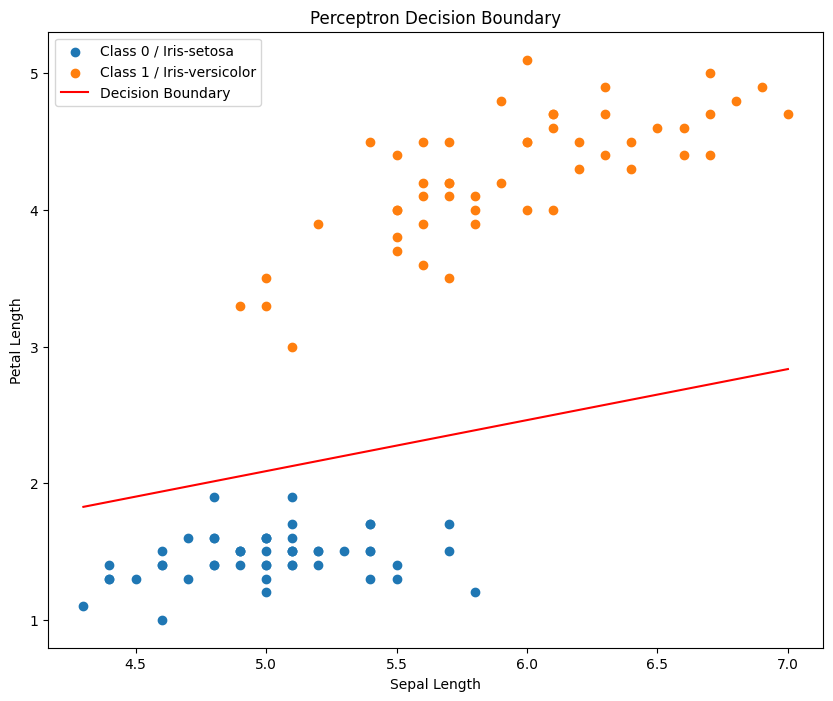

In [74]:
# and now let's plot the decision boundary
plot_decision_boundary(X, y, my_perceptron)

Now let's initialize weights randomly and repeat the whole process

In [78]:
# we need to update the class to initialize weights randomly
class Perceptron_random_weights:
    def __init__(self, learning_rate=0.01, n_iterations=666):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w1 = np.random.randn()  # weight for input 1
        self.w2 = np.random.randn()  # weight for input 2
        self.w3 = np.random.randn()  # weight for constant '-1'

    def step_function(self, x):
        # unit step activation function as it is shown in Figure 2
        return 1 if x >= 0 else 0

    def predict_single(self, x1, x2): 
        # prediction for a single data point
        # weighted sum with -1 input too
        z = self.w1 * x1 + self.w2 * x2 + self.w3 * (-1)
        return self.step_function(z)

    def fit(self, X, y):
        # training the perceptron
        for _ in range(self.n_iterations):
            # for each data point in the dataset
            for idx, (x1, x2) in enumerate(X):
                # prediction for a single data point
                y_pred = self.predict_single(x1, x2)
                error = y[idx] - y_pred
                
                # update weights, with w3 for the -1 input
                self.w1 += self.learning_rate * error * x1
                self.w2 += self.learning_rate * error * x2
                self.w3 += self.learning_rate * error * (-1)


In [80]:
# let's create random perceptron and train it
my_random_perceptron = Perceptron_random_weights()
my_random_perceptron.fit(X, y)

# let's check weights and bias that we got from training our random perceptron
print('Weights and bias for random perceptron', my_random_perceptron.w1, my_random_perceptron.w2, my_random_perceptron.w3)
print('Weights and bias for regular perceptron', my_perceptron.w1, my_perceptron.w2, my_perceptron.w3)

Weights and bias for random perceptron -0.6935314140877282 1.001770452136014 -0.6003201055191746
Weights and bias for regular perceptron -0.03399999999999996 0.09100000000000001 0.02


Obviously all the new weights are different, let's check their plots!

Regular perceptron


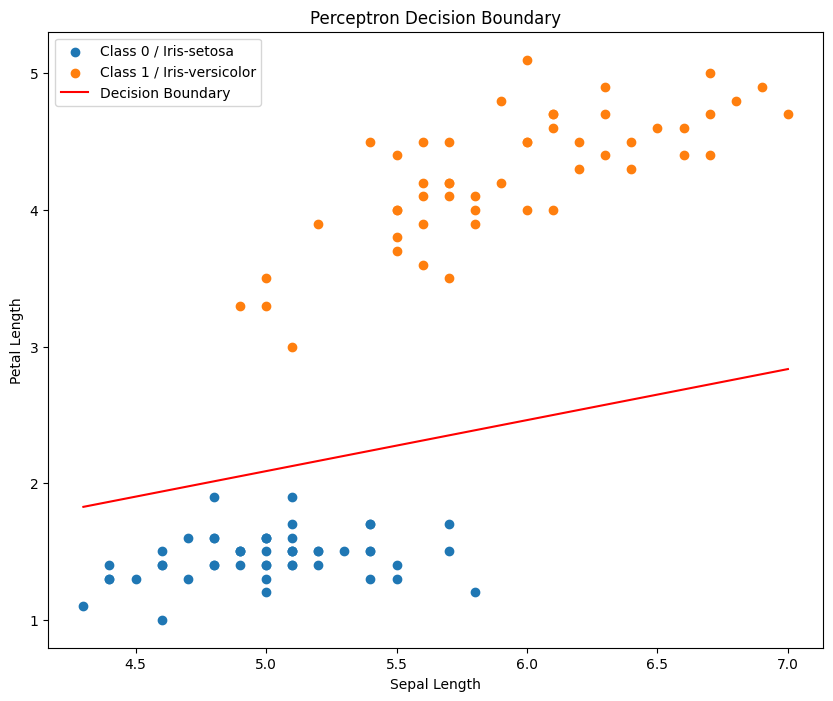

Random weights perceptron


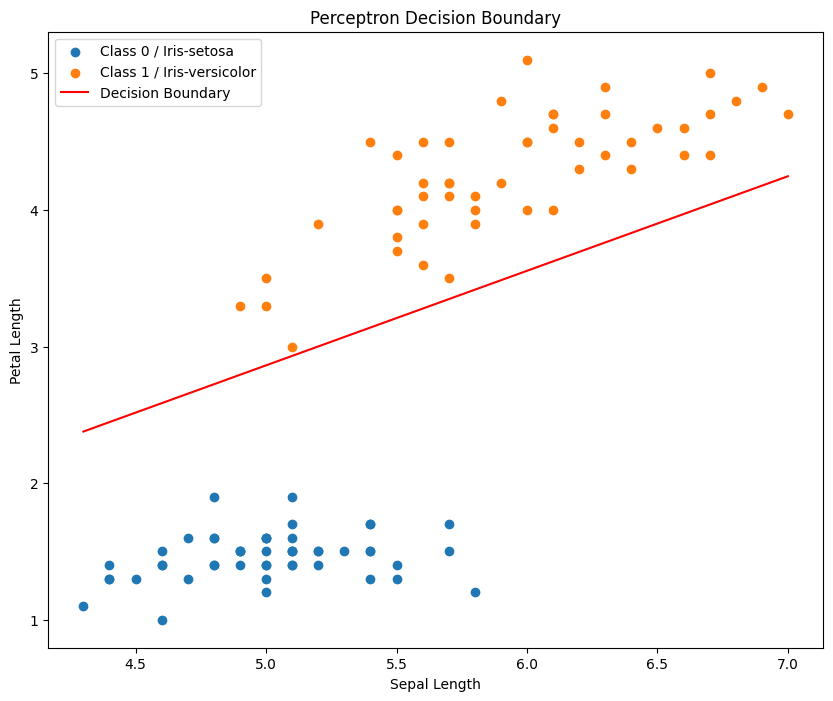

In [91]:
print('Regular perceptron')
plot_decision_boundary(X, y, my_perceptron)
print('Random weights perceptron')
plot_decision_boundary(X, y, my_random_perceptron)


#### Comparing different weight initializations
For this occasion it looks like random weights perceptron works better im my opinion, this should heavily depend on a dataset. 
In the assignment it says to obtain a 'good seperation', which can be very subjective, random weights are a bit better though in terms of steeper decision boundary, it looks like this steeper decision boundary would generalize better if we had a dataset with a bigger amount of samples in the dataset, but I would note that this is based om my intuition.

Now let's adapt the SVM code discussed in the lecture

In [118]:
class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=666):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

# hyperplane for plot results
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

In [104]:
# let's create the SVM and train it
my_svm = SVM(n_iters=666)
my_svm.fit(X, y)

# let's check weights and bias that we got from training our SVM
print('Weights and bias for SVM', my_svm.w, my_svm.b)


Weights and bias for SVM [-0.66402074  1.51080594] -0.43400000000000033


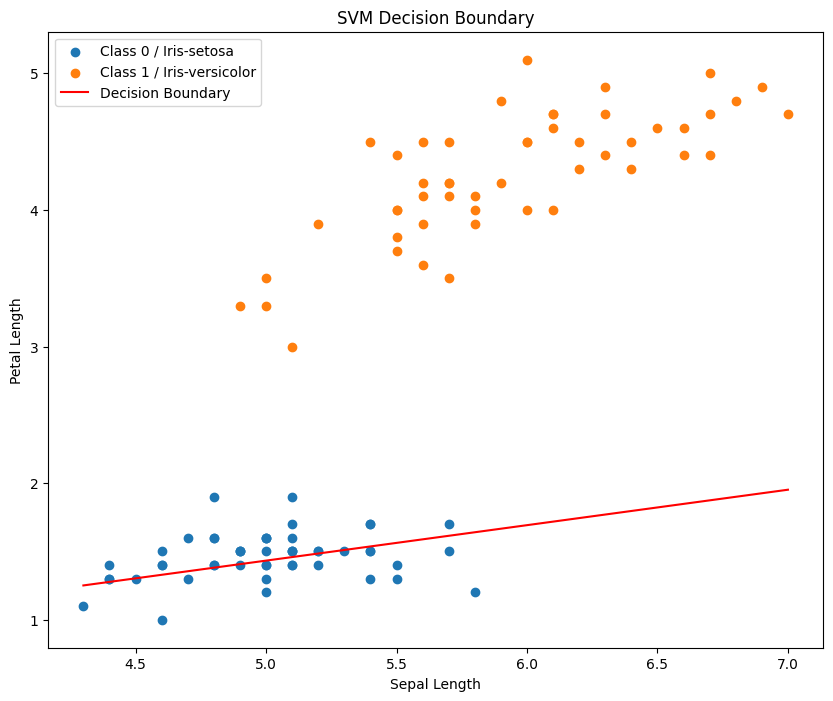

In [119]:
# now let's plot the decision boundary for SVM
def plot_decision_boundary_svm(X, y, svm):
    plt.figure(figsize=(10,8))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0 / Iris-setosa')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1 / Iris-versicolor')
    
    x1 = np.array([X[:, 0].min(), X[:, 0].max()])
    x2 = get_hyperplane(x1, svm.w, svm.b, 0)
    
    plt.plot(x1, x2, 'r-', label='Decision Boundary')

    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.show()

# let's plot the decision boundary for SVM
plot_decision_boundary_svm(X, y, my_svm)



Weights and bias for SVM [0.05419232 1.46005616] -4.0479999999996865


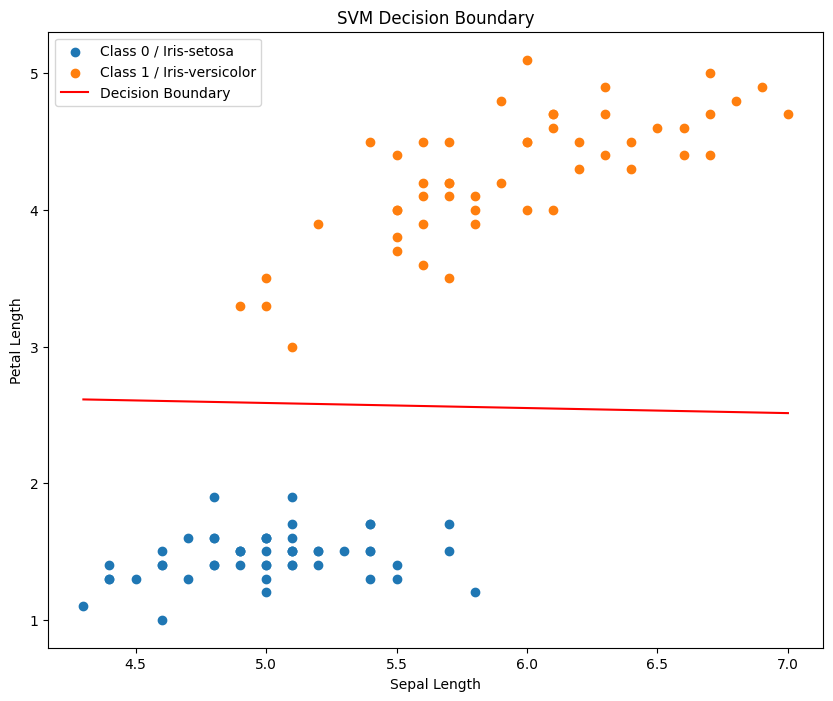

In [120]:
my_svm = SVM(n_iters=66666) # experimenting with 66666 iterations, let's say it is 'overfitting'
my_svm.fit(X, y)

# let's check weights and bias that we got from training our SVM with 666 iterations
print('Weights and bias for SVM', my_svm.w, my_svm.b)

# now let's plot the decision boundary for SVM with 6666 iterations
plot_decision_boundary_svm(X, y, my_svm)

Weights and bias for SVM [-0.5770627   1.27423648] -0.2440000000000002


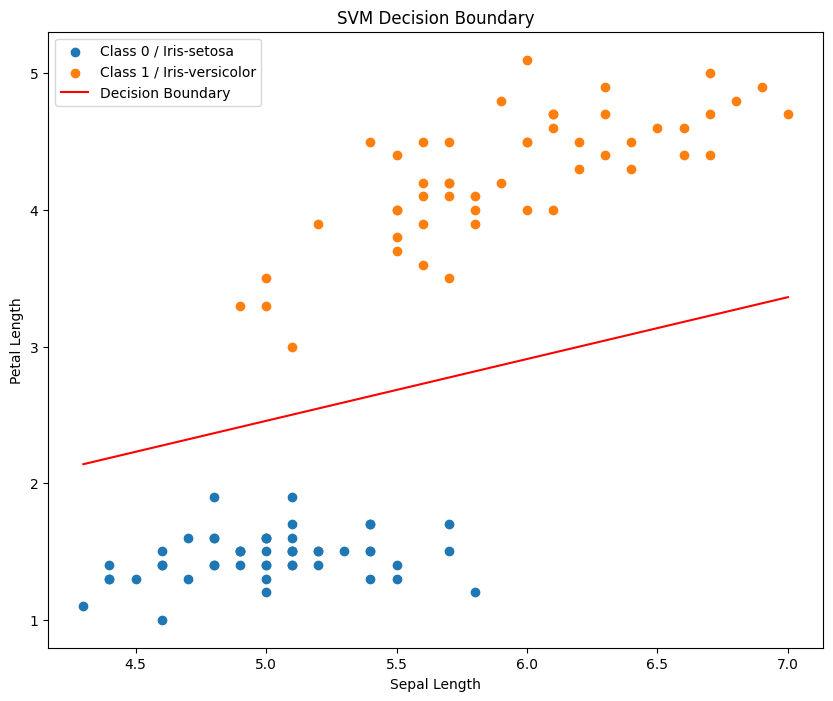

In [121]:
my_svm = SVM(n_iters=66) # experimenting with 66 iterations
my_svm.fit(X, y)

# let's check weights and bias that we got from training our SVM with 66 iterations
print('Weights and bias for SVM', my_svm.w, my_svm.b)

# now let's plot the decision boundary for SVM with 66 iterations
plot_decision_boundary_svm(X, y, my_svm)

Weights and bias for SVM [-0.12691912  0.4889958 ] -0.06600000000000004


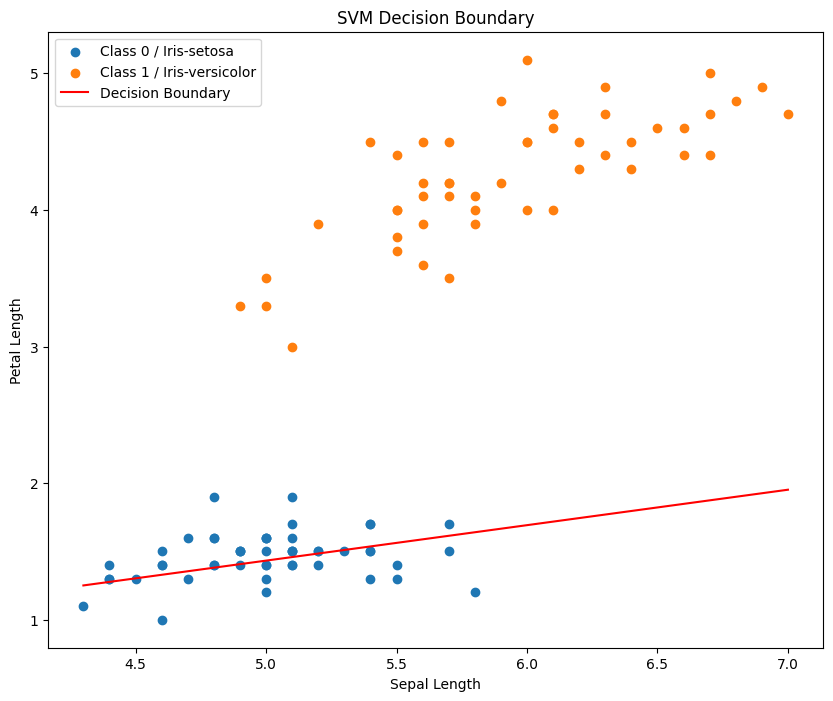

In [122]:
my_svm = SVM(n_iters=6) # experimenting with 6 iterations, let's say it is 'underfitting'
my_svm.fit(X, y)

# let's check weights and bias that we got from training our SVM with 6 iterations
print('Weights and bias for SVM', my_svm.w, my_svm.b)

# now let's plot the decision boundary for SVM with 6 iterations
plot_decision_boundary_svm(X, y, my_svm)

Looks like SVM works fine since we have a linearly separable dataset